# CE811 Lab 9
Dr Michael Fairbank.  University of Essex.

## Training a CNN vision Classifier

- Objectives: Learn more about CNN networks
- Co-objective: Learn about standard Keras vision benchmarks datasets - MNIST, CIFAR-10, Mnist-Fashion

### Instructions: 

1. Go through each code block, study and make sure you understand each of them, and fill in the missing "TODO" parts.

2. Save a neural network for the MNIST dataset and run it as an attachment through the Moodle CE811 Lab 9 Code Checker quiz.

3. Save a neural network for the Cifar10 dataset and run it as an attachment through the Moodle CE811 Lab 9 Code Checker quiz.

4. If you have further time, then work though the "checklist of things to do" in the final block of this page.

Before you start
- Check you have the python packages numpy, matplotlib, tensorflow.
- e.g. install them with "pip3 install numpy, matplotlib, tensorflow"

## Load a vision benchmark dataset

- We will start with the MNIST hand-written numeric digits dataset.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


dataset_name="cifar10"
if dataset_name=="cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3. 
elif dataset_name=="fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
elif dataset_name=="mnist":
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    sys.exit(0)
(train_images0, train_labels0),(test_images0, test_labels0) = dataset.load_data()
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))
train_labels=train_labels0.reshape(-1)
test_labels=test_labels0.reshape(-1)


## Visualise the Dataset

- Show pictures of the images we are trying to learn...

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

## Prep the data
- The keras datasets contain integer pixel intensities from 0 to 255.  We must rescale this to floats from 0 to 1.

In [ ]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=(test_images0/255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images=(train_images0/255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape)==3:
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ",train_images0.shape,"to",train_images.shape,"so that 'channel' dimension exists")

num_classification_categories=train_labels.max()+1



## Define a model
- This means build our neural network here.
- TODO modify the simple model defined below so that it has the following structure.
- Use relu activation functions everywhere, except for the last layer which must have no softmax activation function.
- Use kernel size (3,3) for each convolutional layer, and pool size (2,2) for each max-pooling layer.  Ensure you obtain the archicture exactly as shown here...

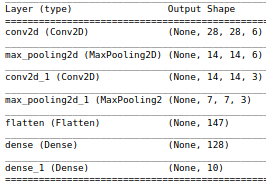


In [ ]:
# build FFNN with CNN architecture
keras_model = keras.Sequential()
keras_model.add(layers.Flatten())
keras_model.add(layers.Dense(128, activation='relu'))
keras_model.add(layers.Dense(num_classification_categories, activation='softmax'))

## View Model Summary

- have a look at the model summary here.

- Try to verify that the number of parameters of each layer matches what you calculate it should be.

In [ ]:
keras_model.build(input_shape=(None,)+train_images.shape[1:])
keras_model.summary()

In [ ]:
if keras_model.count_params()>800000 and dataset_name=="cifar10":
    print("The lab9 progress-checker has a 10MB limit on your model size, so please use a smaller model if you want to validate through the auto-marker!")

## Train the network

In [ ]:
optimizer=keras.optimizers.Adam()

keras_model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = keras_model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


## Plot graphs of learning progress...

- Have a look at these graphs, and try to work out whether any overfitting has occurred, or whether we would gain any benefit for training for more or fewer epochs (TODO)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


## Inspect how well the system is working...
- The test set has a lot of images in it, but we can only view 25 at a time.
- Hence rerun this code block several times, to get a different random set of samples from the test set (TODO)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plot 25 random images from the test set.
first_index=np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names!=None:
        # Add a label underneath, if we have one...
        prediction=keras_model(test_images[i:i+1])[0,:]
        prediction_class=np.argmax(prediction)
        true_label=test_labels[i]
        class_name=class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG"))
plt.show()

## Save the model
- TODO: Once you have the correct layers created (as described above) and have trained a model which can score >96% on the MNIST digits validation set, save your model with the next code block.
- Then use your saved model as an attachment to pass questions 1+2 of the Lab 9 Progress Checker on Moodle.

In [ ]:
# Save the current model into a local folder
keras.models.save_model(keras_model, "Model1"+dataset_name+".h5",save_format='h5')

## CIFAR10 image set

- Next try and learn the CIFAR10 image set
- Repeat all of the steps above, but change the dataset_name in the top code-block to "cifar10"
- We need a bigger network for CIFAR10 than with MNIST.  Use this architecture:
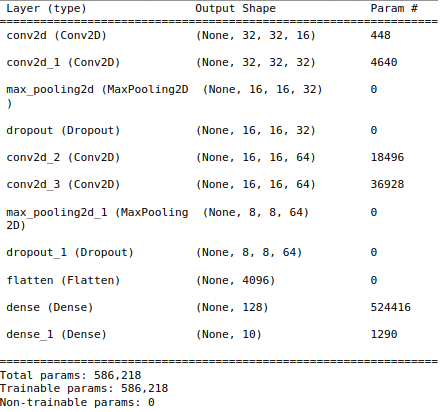
- For the dropout layers, use a Dropout rate of 0.2 (google how to do Dropout layers in tensorflow)
- Train for at least 5 epochs, and you should be able to score >60% on the test set for CIFAR10. 
- Note that the above architecture is still pretty small (particularly, by only having 64 filters).  But we need this particular smaller architecture, so that the auto-marker can handle it comfortably.

Once you have this working, upload your saved model to questions 3+4 of the progress checker.

## Checklist of further things to do

Okay you should have completed the progress checker by now.  But if you want to explore further, then...

1. Check you have made 3 different vision classifiers; for Mnist, mnist-fashion and for cifar10.  No need to bother with cifar100. (TODO)

2. Check in each case you have inspected the results, the validation accuracy and decided whether more or fewer epochs would be required. (TODO)

3. If you have time remaining then see if you can improve performance on Cifar10.  Possible methods:  Try training for longer.  Add more convolutional layers.  Add more filters at each convolutional layer.    If you view the CNN structure used here: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/ (read the final architecture he used at the bottom of the page) then you can see how to score >80% on CIFAR10.  But it requires a lot of CPU/GPU time to get there.  See the next note on google colab for free GPU usage.

4. Try running your notebook in **google colab**, for free extra GPU speed.  See [video](https://panopto.essex.ac.uk/Panopto/Pages/Viewer.aspx?id=e006900f-1e8c-46c6-85d1-ac8e00f39805) showing how to do that.

5. If time permits, then see what the effect of changing the relu activation functions to tanh.

6. If time permits, then try removing all of the convolutional layers, and just have a fully-connected classifier.  Remember you still need the flatten layers though as these images are each rank3 tensors.
